In [ ]:
!pip install -U scikit-learn pandas numpy catboost plotly nbformat

### Read train data

In [ ]:
import pandas as pd

train_data = pd.read_csv('train.csv', header=None)

train_data.head()

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
y = pd.read_csv('train-target.csv', header=None)
y[:10]

In [77]:
from sklearn.model_selection import train_test_split

import pandas as pd

train_data = pd.read_csv('train.csv', header=None)
train_target = pd.read_csv('train-target.csv', header=None)


X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2)




In [84]:
from sklearn.neighbors import KNeighborsClassifier
# В библиотеки sklearn эта метрика
from sklearn.metrics import roc_auc_score

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_clf.fit(X=X_train, y=y_train)

# Посмотрим  метрику  для knn 
# Для ROC-AUC нам нужны вероятности принадлежности положительному классу
# Для получения вероятностей воспользуемся методом predict_proba и нам нужен второй столбец

print(f"kNN при n_neighbors = 1")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_val, knn_clf.predict_proba(X_val)[:, 1])}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, knn_clf.predict_proba(X_train)[:, 1])}")

/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


kNN при n_neighbors = 1
TEST:  ROC-AUC -- 0.7891676900273129
TRAIN: ROC-AUC -- 0.9051223174501029


In [74]:
from sklearn.neighbors import KNeighborsClassifier
# В библиотеки sklearn эта метрика
from sklearn.metrics import roc_auc_score

list_roc_auc = []
list_n = []
for n in range(1, 18):
    knn_clf = KNeighborsClassifier(n_neighbors=n, metric='manhattan')
    knn_clf.fit(X=X_train, y=y_train)

    # Посмотрим эту метрику  для knn 
    # Для ROC-AUC нам нужны вероятности принадлежности положительному классу
    # Для получения вероятностей воспользуемся методом predict_proba и нам нужен второй столбец
    list_roc_auc.append(roc_auc_score(y_val, knn_clf.predict_proba(X_val)[:, 1]))
    list_n.append(n)
    




/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-pac

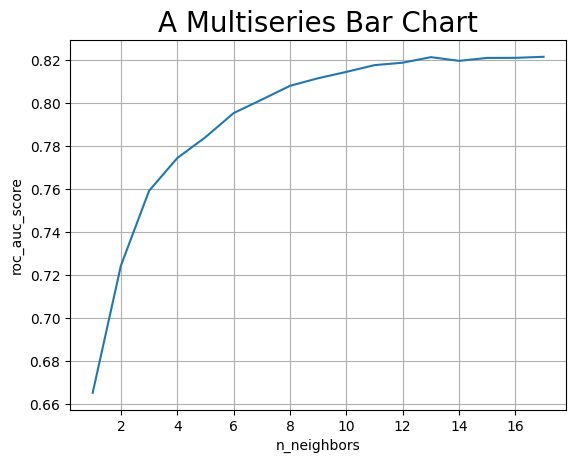

In [82]:
import matplotlib.pyplot as plt

plt.plot(list_n, list_roc_auc)
plt.title('A Multiseries Bar Chart', fontsize=20)
plt.xlabel('n_neighbors')
plt.ylabel('roc_auc_score')
plt.grid(visible=True)
plt.show()

### Correlation matrix

### Columns distribution

### Baseline prediction

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn_clf.fit(train_data, y=train_target)

/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [93]:
def save_array_to_submission(array, name='last_submission'):

    assert array.shape == (2000, 2), 'shape doesnt match'

    df_subm = pd.DataFrame(array, columns=[0,1])

    df_subm[1].to_csv(f'{name}.csv', index=False, header=False)
    return 'ok'

In [95]:
test_data = pd.read_csv('test.csv', header=None)
predict = knn_clf.predict_proba(test_data)
print(predict)
save_array_to_submission(predict, name='knn_n_15')

[[0.8        0.2       ]
 [0.86666667 0.13333333]
 [0.66666667 0.33333333]
 ...
 [0.73333333 0.26666667]
 [0.66666667 0.33333333]
 [0.26666667 0.73333333]]


'ok'